## Converting the raw data into the csv or excel format

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/UALR/GA/GA/Ocean_Data/MRSL1_2020.txt'

# Create a DataFrame from the data file
df = pd.read_fwf(file_path, skiprows=1, header=None, colspecs='infer')

# Add column names
column_names = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]
df.columns = column_names

# Combine YY, MM, and DD columns into a new column named "Date"
df['Date'] = df['YY'].astype(str)+'/' + df['MM'].astype(str).str.zfill(2) +'/'+ df['DD'].astype(str).str.zfill(2)+ ' ' +df['hh'].astype(str).str.zfill(2)+df['mm'].astype(str).str.zfill(2)

# dropping the date and time columns

df.drop(['YY','MM','DD','hh','mm'],axis=1,inplace=True)

df

# Save the DataFrame to an Excel file
df.to_csv("/content/drive/MyDrive/UALR/GA/GA/Ocean_Data/cleaned_files/MRSL1_2020_Out.csv", index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Applying UMAP

In [ ]:
pip install umap-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

import umap.umap_ as umap

In [ ]:
df.describe()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,816.0,816.000000,816.000000,816.0,816.0,816.0,816.0,816.0,816.000000,816.0,816.0,816.0,816.0
mean,999.0,5.415809,6.800000,99.0,99.0,99.0,999.0,9999.0,20.925735,999.0,999.0,99.0,99.0
std,0.0,2.375511,2.533351,0.0,0.0,0.0,0.0,0.0,3.119324,0.0,0.0,0.0,0.0
min,999.0,0.000000,0.500000,99.0,99.0,99.0,999.0,9999.0,10.500000,999.0,999.0,99.0,99.0
25%,999.0,3.600000,5.100000,99.0,99.0,99.0,999.0,9999.0,19.500000,999.0,999.0,99.0,99.0
50%,999.0,5.700000,6.700000,99.0,99.0,99.0,999.0,9999.0,21.300000,999.0,999.0,99.0,99.0
75%,999.0,7.200000,8.800000,99.0,99.0,99.0,999.0,9999.0,23.200000,999.0,999.0,99.0,99.0
max,999.0,13.900000,16.500000,99.0,99.0,99.0,999.0,9999.0,27.200000,999.0,999.0,99.0,99.0


In [ ]:
# Count missing values in each column
print(df.isna().sum())

WDIR    0
WSPD    0
GST     0
WVHT    0
DPD     0
APD     0
MWD     0
PRES    0
ATMP    0
WTMP    0
DEWP    0
VIS     0
TIDE    0
Date    0
dtype: int64


In [ ]:
df.set_index('Date')

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
Date,,,,,,,,,,,,,
2020/01/01 0000,999,2.1,3.1,99.0,99.0,99.0,999,9999.0,13.7,999.0,999.0,99.0,99.0
2020/01/01 0100,999,4.6,5.7,99.0,99.0,99.0,999,9999.0,13.7,999.0,999.0,99.0,99.0
2020/01/01 0200,999,4.1,5.7,99.0,99.0,99.0,999,9999.0,13.6,999.0,999.0,99.0,99.0
2020/01/01 0300,999,3.1,4.1,99.0,99.0,99.0,999,9999.0,13.5,999.0,999.0,99.0,99.0
2020/01/01 0400,999,1.0,2.1,99.0,99.0,99.0,999,9999.0,13.3,999.0,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/04/13 1300,999,3.1,4.6,99.0,99.0,99.0,999,9999.0,20.4,999.0,999.0,99.0,99.0
2020/04/13 1400,999,2.6,4.6,99.0,99.0,99.0,999,9999.0,19.0,999.0,999.0,99.0,99.0
2020/04/13 1500,999,3.6,6.2,99.0,99.0,99.0,999,9999.0,18.6,999.0,999.0,99.0,99.0


In [ ]:
df.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
0,999,2.1,3.1,99.0,99.0,99.0,999,9999.0,13.7,999.0,999.0,99.0,99.0,2020/01/01 0000
1,999,4.6,5.7,99.0,99.0,99.0,999,9999.0,13.7,999.0,999.0,99.0,99.0,2020/01/01 0100
2,999,4.1,5.7,99.0,99.0,99.0,999,9999.0,13.6,999.0,999.0,99.0,99.0,2020/01/01 0200
3,999,3.1,4.1,99.0,99.0,99.0,999,9999.0,13.5,999.0,999.0,99.0,99.0,2020/01/01 0300
4,999,1.0,2.1,99.0,99.0,99.0,999,9999.0,13.3,999.0,999.0,99.0,99.0,2020/01/01 0400


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
pd.api.types.is_datetime64_any_dtype(df['Date'])

True

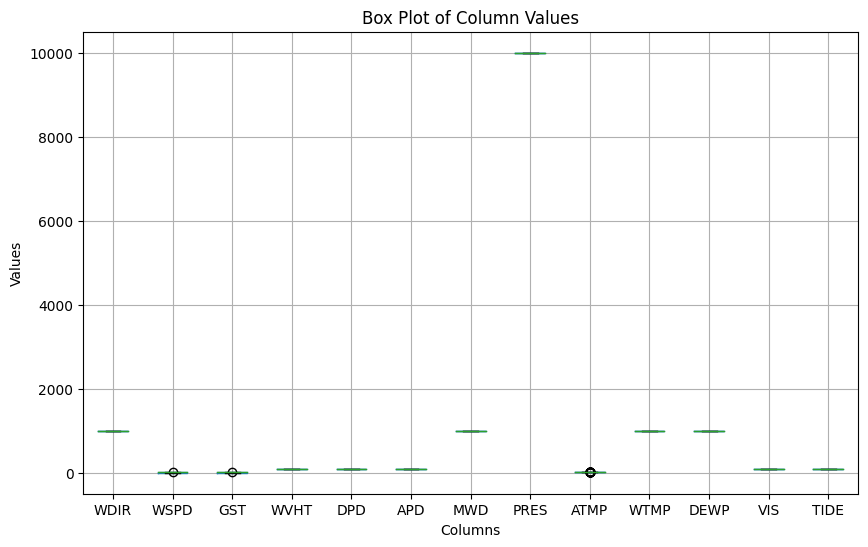

In [ ]:
# Ouliers Detection

# Create box plots for each column in the DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

df[['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP',
       'WTMP', 'DEWP', 'VIS', 'TIDE', 'Date']].boxplot()

# Set the title and labels
plt.title('Box Plot of Column Values')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

In [ ]:
df.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
0,999,2.1,3.1,99.0,99.0,99.0,999,9999.0,13.7,999.0,999.0,99.0,99.0,2020-01-01 00:00:00
1,999,4.6,5.7,99.0,99.0,99.0,999,9999.0,13.7,999.0,999.0,99.0,99.0,2020-01-01 01:00:00
2,999,4.1,5.7,99.0,99.0,99.0,999,9999.0,13.6,999.0,999.0,99.0,99.0,2020-01-01 02:00:00
3,999,3.1,4.1,99.0,99.0,99.0,999,9999.0,13.5,999.0,999.0,99.0,99.0,2020-01-01 03:00:00
4,999,1.0,2.1,99.0,99.0,99.0,999,9999.0,13.3,999.0,999.0,99.0,99.0,2020-01-01 04:00:00


In [ ]:
data_impt = df[['WSPD','GST','ATMP']]

In [ ]:
data_impt

,WSPD,GST,ATMP
0,2.1,3.1,13.7
1,4.6,5.7,13.7
2,4.1,5.7,13.6
3,3.1,4.1,13.5
4,1.0,2.1,13.3
...,...,...,...
811,3.1,4.6,20.4
812,2.6,4.6,19.0
813,3.6,6.2,18.6
814,3.1,5.7,18.2


In [ ]:
scaler = StandardScaler()
data_impt = scaler.fit_transform(data_impt)

In [ ]:
data_impt

array([[-1.39668604, -1.46141214, -2.31786324],
       [-0.34363525, -0.43447388, -2.31786324],
       [-0.55424541, -0.43447388, -2.34994112],
       ...,
       [-0.76485557, -0.23698575, -0.74604675],
       [-0.97546573, -0.43447388, -0.8743583 ],
       [-0.34363525,  0.1579905 , -0.90643619]])

In [ ]:
data_impt = pd.DataFrame(data_impt,columns=['WSPD','GST','ATMP'])
data_impt

,WSPD,GST,ATMP
0,-1.396686,-1.461412,-2.317863
1,-0.343635,-0.434474,-2.317863
2,-0.554245,-0.434474,-2.349941
3,-0.975466,-1.066436,-2.382019
4,-1.860028,-1.856388,-2.446175
...,...,...,...
811,-0.975466,-0.868948,-0.168645
812,-1.186076,-0.868948,-0.617735
813,-0.764856,-0.236986,-0.746047
814,-0.975466,-0.434474,-0.874358


In [ ]:
data_impt['Date']=df['Date']
data_impt

,WSPD,GST,ATMP,Date
0,-1.396686,-1.461412,-2.317863,2020-01-01 00:00:00
1,-0.343635,-0.434474,-2.317863,2020-01-01 01:00:00
2,-0.554245,-0.434474,-2.349941,2020-01-01 02:00:00
3,-0.975466,-1.066436,-2.382019,2020-01-01 03:00:00
4,-1.860028,-1.856388,-2.446175,2020-01-01 04:00:00
...,...,...,...,...
811,-0.975466,-0.868948,-0.168645,2020-04-13 13:00:00
812,-1.186076,-0.868948,-0.617735,2020-04-13 14:00:00
813,-0.764856,-0.236986,-0.746047,2020-04-13 15:00:00
814,-0.975466,-0.434474,-0.874358,2020-04-13 16:00:00


In [ ]:
data_impt['Date'] = data_impt['Date'].apply(lambda x:x.timestamp())

In [ ]:
data_impt.isna().sum() # Checking null values

WSPD    0
GST     0
ATMP    0
Date    0
dtype: int64

## Applying UMAP

In [ ]:
# Apply UMAP to the entire DataFrame

SEED = 43
reducer = umap.UMAP(random_state=SEED,
                    n_neighbors = 5,
                    n_components = 2,
                    min_dist = 0.7)
# reducer = umap.UMAP(random_state=SEED)

umap_result = reducer.fit_transform(data_impt)

umap_result

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


array([[ 15.5966215,   1.6430712],
       [ 15.480872 ,   1.9372557],
       [ 15.512262 ,   1.9133828],
       ...,
       [-10.778091 ,  15.195972 ],
       [-10.700263 ,  15.269087 ],
       [-10.65895  ,  15.308595 ]], dtype=float32)

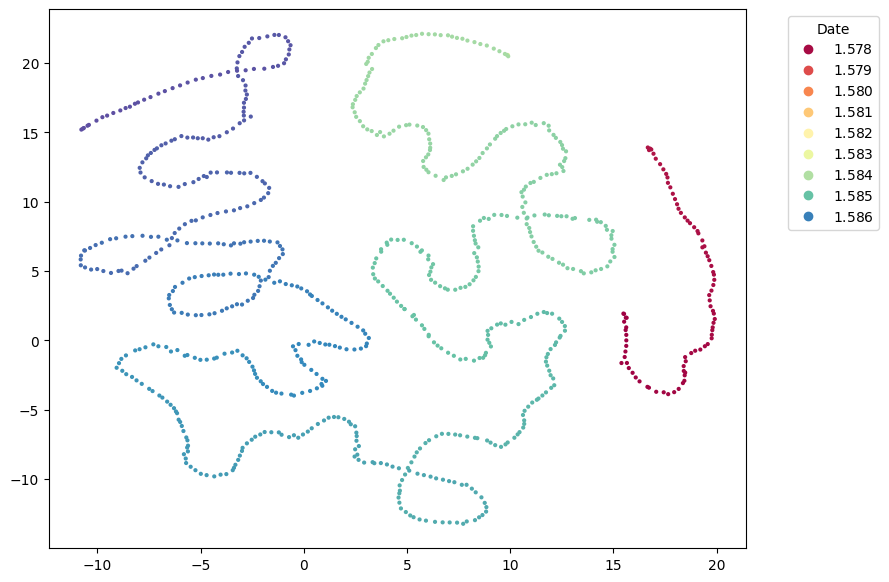

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_impt['Date'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Date',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

In [ ]:
umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1'])

In [ ]:
umap_result_df

,UMAP-0,UMAP-1
0,15.596622,1.643071
1,15.480872,1.937256
2,15.512262,1.913383
3,15.638091,1.635399
4,15.516995,1.352757
...,...,...
811,-10.414275,15.533757
812,-10.480059,15.474597
813,-10.778091,15.195972
814,-10.700263,15.269087


In [ ]:
data_impt['Original_Date'] = df['Date']
data_impt

,WSPD,GST,ATMP,Date,Original_Data
0,-1.396686,-1.461412,-2.317863,1.577837e+09,2020-01-01 00:00:00
1,-0.343635,-0.434474,-2.317863,1.577840e+09,2020-01-01 01:00:00
2,-0.554245,-0.434474,-2.349941,1.577844e+09,2020-01-01 02:00:00
3,-0.975466,-1.066436,-2.382019,1.577848e+09,2020-01-01 03:00:00
4,-1.860028,-1.856388,-2.446175,1.577851e+09,2020-01-01 04:00:00
...,...,...,...,...,...
811,-0.975466,-0.868948,-0.168645,1.586783e+09,2020-04-13 13:00:00
812,-1.186076,-0.868948,-0.617735,1.586786e+09,2020-04-13 14:00:00
813,-0.764856,-0.236986,-0.746047,1.586790e+09,2020-04-13 15:00:00
814,-0.975466,-0.434474,-0.874358,1.586794e+09,2020-04-13 16:00:00


In [ ]:
data_important = pd.concat([data_impt,umap_result_df], axis=1)

In [ ]:
data_important

,WSPD,GST,ATMP,Date,Original_Data,UMAP-0,UMAP-1
0,-1.396686,-1.461412,-2.317863,1.577837e+09,2020-01-01 00:00:00,15.596622,1.643071
1,-0.343635,-0.434474,-2.317863,1.577840e+09,2020-01-01 01:00:00,15.480872,1.937256
2,-0.554245,-0.434474,-2.349941,1.577844e+09,2020-01-01 02:00:00,15.512262,1.913383
3,-0.975466,-1.066436,-2.382019,1.577848e+09,2020-01-01 03:00:00,15.638091,1.635399
4,-1.860028,-1.856388,-2.446175,1.577851e+09,2020-01-01 04:00:00,15.516995,1.352757
...,...,...,...,...,...,...,...
811,-0.975466,-0.868948,-0.168645,1.586783e+09,2020-04-13 13:00:00,-10.414275,15.533757
812,-1.186076,-0.868948,-0.617735,1.586786e+09,2020-04-13 14:00:00,-10.480059,15.474597
813,-0.764856,-0.236986,-0.746047,1.586790e+09,2020-04-13 15:00:00,-10.778091,15.195972
814,-0.975466,-0.434474,-0.874358,1.586794e+09,2020-04-13 16:00:00,-10.700263,15.269087


In [ ]:
# Exporting the csv file
data_important.to_csv("/content/drive/My Drive/UALR/GA/GA/Ocean_Data/umap_MRSL1_2020_Processed.csv")